# Bar Chart

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

## Dataset

In [3]:
# Loading 'tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## (1) Bar Chart by matplotlib

In [4]:
# Summary Statistics
tips_sum_by_day = tips.groupby('day').tip.sum()
tips_sum_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [5]:
label = ['Thur', 'Fri', 'Sat', 'Sun']
index = np.arange(len(label))

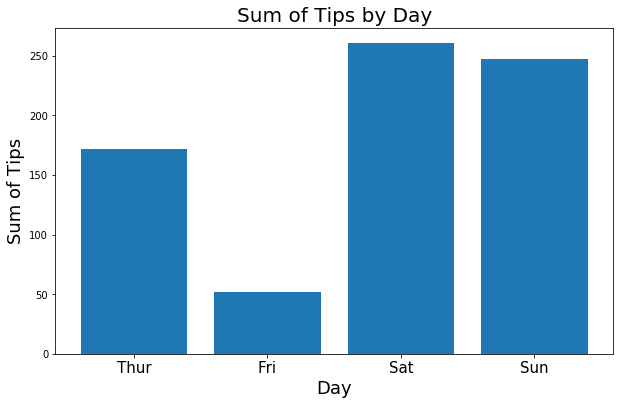

In [18]:
# Basic Bar Chart
plt.bar(index, tips_sum_by_day)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.title('Sum of Tips by Day', fontsize=20)
plt.show()

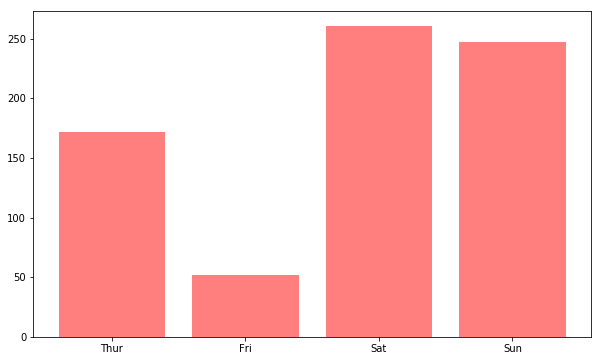

In [19]:
# bar color, transparency
plt.bar(label, tips_sum_by_day, 
        color='red', # color
        alpha=0.5) # transparency
plt.show()

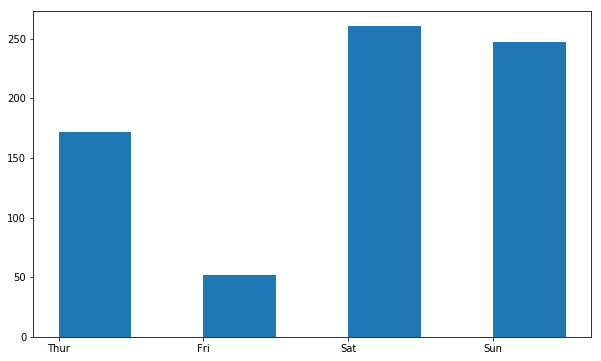

In [20]:
# bar width, align
plt.bar(label, tips_sum_by_day, 
        width=0.5, # default: 0.8
        align='edge') # default: 'center'
plt.show()

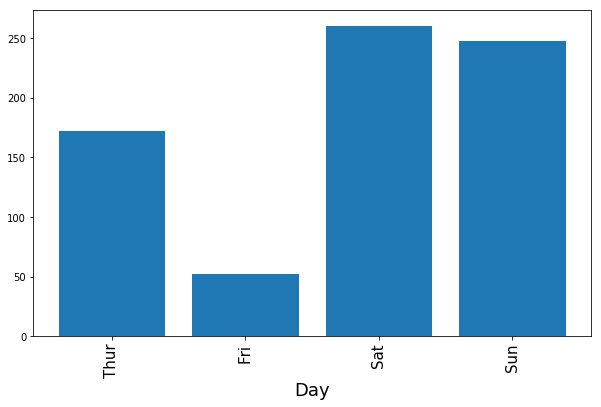

In [21]:
# X tick labels rotation
plt.bar(index, tips_sum_by_day)
plt.xlabel('Day', fontsize=18)
plt.xticks(index, label, fontsize=15, 
           rotation=90) # when X tick labels are long
plt.show()

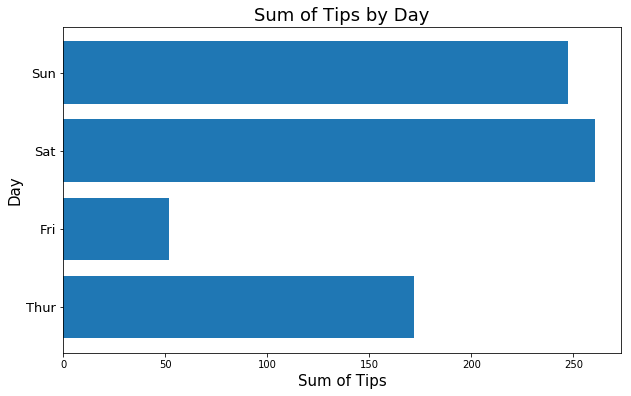

In [22]:
# Horizontal Bar Chart
plt.barh(index, tips_sum_by_day)
plt.title('Sum of Tips by Day', fontsize=18)
plt.ylabel('Day', fontsize=15)
plt.xlabel('Sum of Tips', fontsize=15)
plt.yticks(index, label, fontsize=13, rotation=0)
plt.show()

### Bar Chart by Groups

In [11]:
# summary by group
tips_sum_by_day_male = tips[tips['sex'] == 'Male'].groupby('day').tip.sum()
tips_sum_by_day_female = tips[tips['sex'] == 'Female'].groupby('day').tip.sum()

print('--Male--')
print(tips_sum_by_day_male);
print(' ')
print('--Female--')
print(tips_sum_by_day_female);

--Male--
day
Thur     89.41
Fri      26.93
Sat     181.95
Sun     186.78
Name: tip, dtype: float64
 
--Female--
day
Thur    82.42
Fri     25.03
Sat     78.45
Sun     60.61
Name: tip, dtype: float64


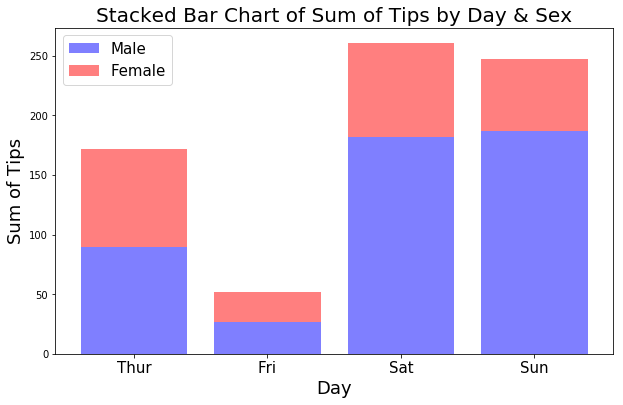

In [23]:
# Stacked Bar Chart
label = ['Thur', 'Fri', 'Sat', 'Sun']
N = len(tips['day'].unique())
index = np.arange(N)
alpha = 0.5

p1 = plt.bar(index, tips_sum_by_day_male, color='b', alpha=alpha)
p2 = plt.bar(index, tips_sum_by_day_female, color='r', alpha=alpha,
             bottom=tips_sum_by_day_male)
plt.title('Stacked Bar Chart of Sum of Tips by Day & Sex', fontsize=20)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.show()

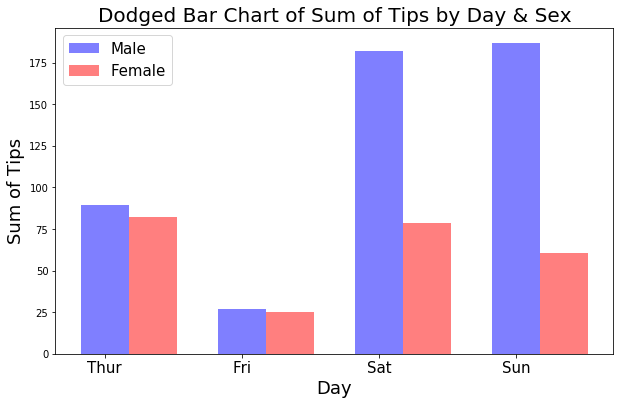

In [24]:
# Dodged Bar Chart (with same X coordinates side by side)
bar_width = 0.35
alpha = 0.5

p1 = plt.bar(index, tips_sum_by_day_male, 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')
p2 = plt.bar(index + bar_width, tips_sum_by_day_female, 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')

plt.title('Dodged Bar Chart of Sum of Tips by Day & Sex', fontsize=20)
plt.ylabel('Sum of Tips', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=15)
plt.show()

## (2) Bar Chart by using seaborn

In [14]:
tips_sum_by_day_sex = pd.DataFrame(tips.groupby(['day', 'sex']).tip.sum())
tips_sum_by_day_sex = tips_sum_by_day_sex.reset_index()
tips_sum_by_day_sex

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95
5,Sat,Female,78.45
6,Sun,Male,186.78
7,Sun,Female,60.61


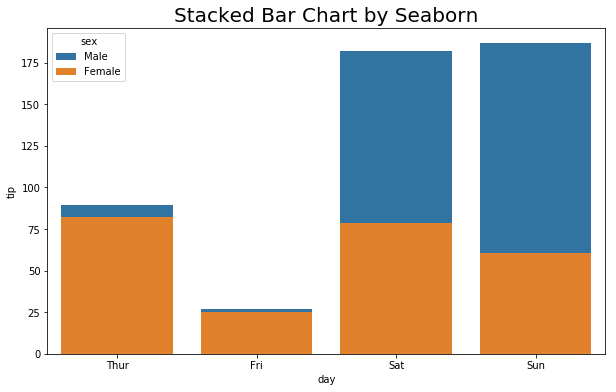

In [25]:
# Stacked Bar Chart
sns.barplot(x='day', y='tip', hue='sex', data=tips_sum_by_day_sex, 
           dodge=False)
plt.title('Stacked Bar Chart by Seaborn', fontsize='20')
plt.show()

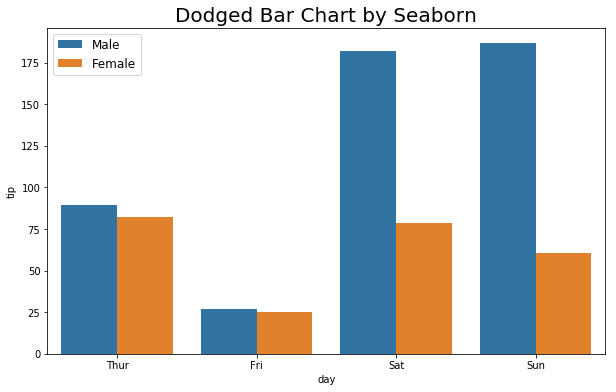

In [30]:
# Dodged Bar Chart
sns.barplot(x='day', y='tip', hue='sex', data=tips_sum_by_day_sex)
plt.title('Dodged Bar Chart by Seaborn', fontsize=20)
plt.legend(fontsize=12)
plt.show()

## (3) Bar Chart by pandas

In [4]:
# make a DataFrame
tips_sum_by_day = pd.DataFrame(tips.groupby('day').tip.sum())
tips_sum_by_day = tips_sum_by_day.reset_index()
tips_sum_by_day

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


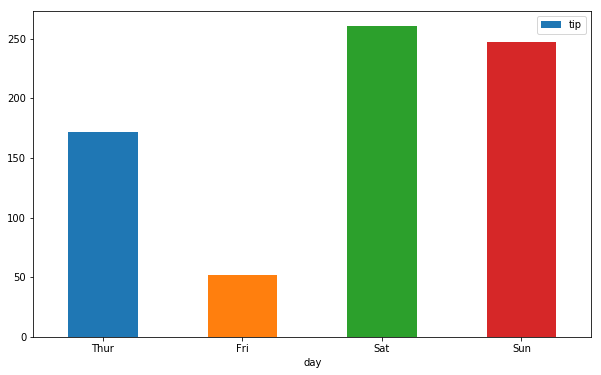

In [73]:
# basic bar chart with a single column
tips_sum_by_day.plot.bar(x='day', y='tip', rot=0)
plt.show()

In [64]:
# making a DataFrame with 'day' and 'sex' groups
tips_sum_by_day_sex = pd.DataFrame(tips.groupby(['day', 'sex']).tip.sum())
tips_sum_by_day_sex = tips_sum_by_day_sex.reset_index()

# pivot
tips_sum_by_day_sex_pivot = \
    tips_sum_by_day_sex.pivot(index='day', 
                              columns='sex', 
                              values='tip')
tips_sum_by_day_sex_pivot

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


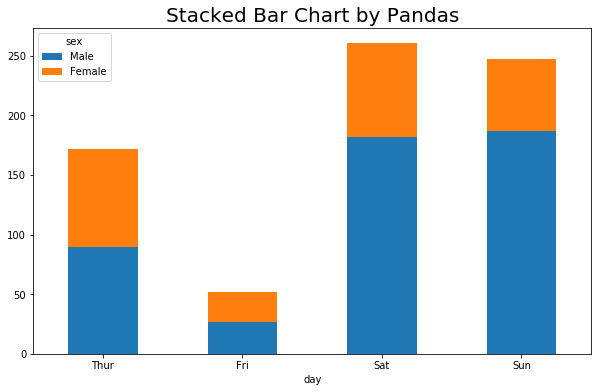

In [61]:
# Stacked Bar Chart
tips_sum_by_day_sex_pivot.plot.bar(stacked=True, rot=0)
plt.title('Stacked Bar Chart by Pandas', fontsize=20)
plt.show()

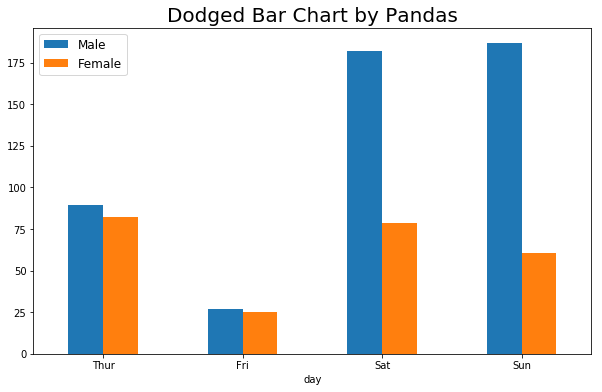

In [62]:
# Dodged Bar Chart
tips_sum_by_day_sex_pivot.plot(kind='bar', rot=0)
plt.title('Dodged Bar Chart by Pandas', fontsize=20)
plt.legend(fontsize='12')
plt.show()

# The End